# EDA

En esta etapa se realizó la conversión de los tipos de datos, con el fin de garantizar el análisis estadístico adecuado de las variables tanto categóricas como numéricas.

In [2]:
import pandas as pd

- Tabla. officials

In [ ]:
officials = pd.read_csv(r"C:\Users\Valentina\OneDrive\Desktop\HENRY\PROYECTO FINAL\ARCHIVOS CSV DE NBA\csv\officials.csv")

In [ ]:
officials.shape

In [ ]:
officials.head
officials.tail

In [ ]:
officials.info()

In [ ]:
#Cambiar tipo de dato
officials["game_id"] = officials["game_id"].astype(str)
officials["official_id"] = officials["official_id"].astype(str)

In [ ]:
#Verificación: 
print("Tipos de datos actualizados:")
print(officials.dtypes)

In [ ]:
#Diagnóstico de nulos. Función general. (Será utilizada para el análisis de los diferentes CSV)
def diagnostico_nulos(df, nombre=""):
    # se genera un nuevo DataFrame resumenulos con dos columnas: Valores nulos (conteo absoluto) y % de nulos 
    resumenulos = pd.DataFrame({
        "Valores nulos": df.isnull().sum(),
        "% de nulos": 100 * df.isnull().mean()
    })
    # Ordenar de mayor a menor % de nulos
    resumenulos = resumenulos.sort_values("% de nulos", ascending=False)

    # Asignar nombre al índice
    resumenulos.index.name = nombre
    
    return resumenulos

In [ ]:
resumenulos = diagnostico_nulos(officials, "df")
print(resumenulos)

In [ ]:
#Análisis descriptivo 
officials.describe()                    # Estadísticas de variables numéricas

In [ ]:
officials.describe(include='object')    # Para variables categóricas

- tabla: other_sats

In [4]:
other_stats = pd.read_csv(r"C:\Users\Valentina\OneDrive\Desktop\HENRY\PROYECTO FINAL\ARCHIVOS CSV DE NBA\csv\other_stats.csv")

In [ ]:
other_stats.shape

In [ ]:
other_stats.head
other_stats.tail

In [ ]:
print(other_stats.info())

In [5]:
#Cambiar tipo de dato
other_stats["game_id"] = other_stats["game_id"].astype(str)
other_stats["league_id"] = other_stats["league_id"].astype(str)
other_stats["team_id_home"] = other_stats["team_id_home"].astype(str)
other_stats["team_id_away"] = other_stats ["team_id_away"].astype(str)

In [15]:
#Verificación: 
print("Tipos de datos actualizados:")
print(other_stats.dtypes)

Tipos de datos actualizados:
game_id                    object
league_id                  object
team_id_home               object
team_abbreviation_home     object
team_city_home             object
pts_paint_home              int64
pts_2nd_chance_home         int64
pts_fb_home                 int64
largest_lead_home           int64
lead_changes                int64
times_tied                  int64
team_turnovers_home       float64
total_turnovers_home      float64
team_rebounds_home        float64
pts_off_to_home           float64
team_id_away               object
team_abbreviation_away     object
team_city_away             object
pts_paint_away              int64
pts_2nd_chance_away         int64
pts_fb_away                 int64
largest_lead_away           int64
team_turnovers_away       float64
total_turnovers_away      float64
team_rebounds_away        float64
pts_off_to_away           float64
dtype: object


In [ ]:
resumenulos = diagnostico_nulos(other_stats, "df")
print(resumenulos)

In [ ]:
#Análisis descriptivo 
other_stats.describe() # Estadísticas de variables numéricas

In [ ]:
#Función general para calcular la mediana de todas las columnas numércias. (Será utilizada para el resto de los CSV)

def calcular_mediana(df):

    # Seleccionar solo las columnas numéricas
    columnas_numericas = df.select_dtypes(include='number')
    
    # Calcular la mediana de cada una
    medianas = columnas_numericas.median()
    
    return medianas

In [ ]:
medianas_other_stats = calcular_mediana(other_stats)
print(medianas_other_stats)

In [ ]:
other_stats.describe(include='object')    # Para variables categóricas

Tabla: player

In [ ]:
player = pd.read_csv(r"C:\Users\Valentina\OneDrive\Desktop\HENRY\PROYECTO FINAL\ARCHIVOS CSV DE NBA\csv\player.csv")

In [ ]:
player.shape

In [ ]:
player.head
player.tail

In [ ]:
player.info ()

In [ ]:
#cambiar tipos de datos.
player["id"] = player["id"].astype(str)
player["is_active"] = player["is_active"].astype(bool)

In [ ]:
resumenulos = diagnostico_nulos(player, "df")
print(resumenulos)

In [ ]:
#Análisis descriptivo. Solo variables categóricas. 
player.describe()              

- Tabla: play by play

In [3]:
pbp = pd.read_csv(r"C:\Users\Valentina\Downloads\archive (1)\csv\play_by_play.csv")

In [ ]:
pbp.shape 

In [ ]:
pbp.info ()

In [4]:
#cambiar el tipo de datos
# IDs → texto (string)
id_cols = [
    "game_id",
    "player1_id", "player2_id", "player3_id",
    "player1_team_id", "player2_team_id", "player3_team_id"
]
pbp[id_cols] = pbp[id_cols].astype("string")

# Tipos de persona → enteros con soporte para NaN
person_cols = ["person1type", "person2type", "person3type"]
pbp[person_cols] = pbp[person_cols].astype("Int64")

# Tiempos → convertir a formato hora real
time_cols = ["wctimestring", "pctimestring"]

for col in time_cols:
    pbp[col] = pd.to_datetime(
        pbp[col],
        format="%M:%S",      # formato minutos:segundos (ejemplo: "10:35")
        errors="coerce"       # pone NaT si hay valores raros
    ).dt.time                 # deja solo la parte de hora:minuto:segundo

# A booleano
pbp["video_available_flag"] = pbp["video_available_flag"].astype(bool)

#Verificación: 
print("Tipos de datos actualizados:")
print(pbp.dtypes)

Tipos de datos actualizados:
game_id                      string[python]
eventnum                              int64
eventmsgtype                          int64
eventmsgactiontype                    int64
period                                int64
wctimestring                 datetime64[ns]
pctimestring                         object
homedescription                      object
neutraldescription                   object
visitordescription                   object
score                                object
scoremargin                          object
person1type                           Int64
player1_id                   string[python]
player1_name                         object
player1_team_id              string[python]
player1_team_city                    object
player1_team_nickname                object
player1_team_abbreviation            object
person2type                           Int64
player2_id                   string[python]
player2_name                         object
pla

In [ ]:
pbp.to_csv("pbp_cambiotipodato.csv", index=False, encoding="utf-8")

In [ ]:
resumenulos = diagnostico_nulos(pbp, "df")
print(resumenulos)

In [5]:
#Análisis descriptivo 
pbp.describe()                    # Estadísticas de variables numéricas

,eventnum,eventmsgtype,eventmsgactiontype,period,wctimestring,person1type,person2type,person3type
count,1.359290e+07,1.359290e+07,1.359290e+07,1.359290e+07,0,13589601.0,13592899.0,13592899.0
mean,2.725295e+02,3.975202e+00,9.359604e+00,2.548225e+00,NaT,4.265943,1.303011,0.224824
min,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,NaT,0.0,0.0,0.0
25%,1.310000e+02,2.000000e+00,0.000000e+00,2.000000e+00,NaT,4.0,0.0,0.0
50%,2.660000e+02,4.000000e+00,1.000000e+00,3.000000e+00,NaT,4.0,0.0,0.0
75%,4.000000e+02,5.000000e+00,5.000000e+00,4.000000e+00,NaT,5.0,4.0,0.0
max,1.018000e+03,1.800000e+01,1.100000e+02,8.000000e+00,NaT,7.0,7.0,5.0
std,1.668649e+02,2.618653e+00,2.094391e+01,1.139473e+00,NaN,0.943985,2.059785,0.759782


In [ ]:
pbp.describe(include='object')    # Para variables categóricas

Visualización

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Definir la paleta de colores

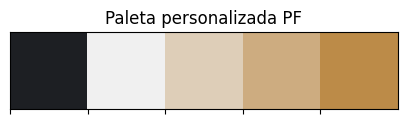

In [2]:
# Paleta 
paleta_pf = [
    "#1d1f23", "#f0f0f0", "#deceb8", "#cdac80", "#bc8b48"
]

# Aplicarla globalmente
sns.set_palette(sns.color_palette(paleta_pf))

# Mostrar paleta
sns.palplot(sns.color_palette(paleta_pf))
plt.title("Paleta personalizada PF")
plt.show()

- Tabla other_stats

C:\Users\Valentina\AppData\Local\Temp\ipykernel_3224\1971696367.py:11: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(data=resumen, x="Métrica", y="Promedio", hue="Condición", palette=paleta_pf)


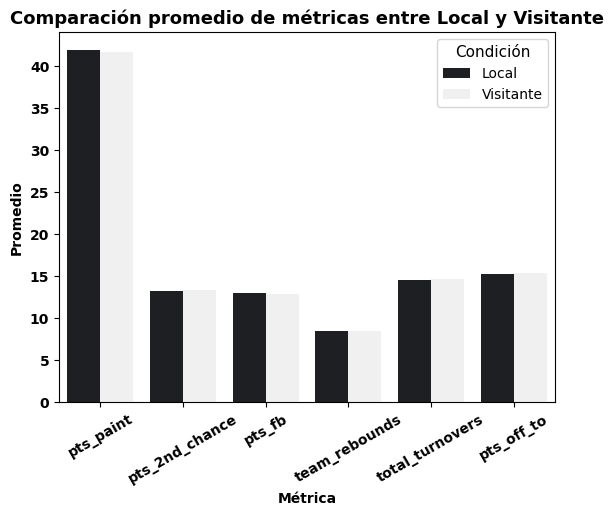

In [6]:
#Comparación general entre local y visitante.
#Barras comparando promedios locales vs visitantes

metricas = ["pts_paint", "pts_2nd_chance", "pts_fb", "team_rebounds", "total_turnovers", "pts_off_to"]
resumen = pd.DataFrame({
    "Métrica": metricas,
    "Local": [other_stats[f"{m}_home"].mean() for m in metricas],
    "Visitante": [other_stats[f"{m}_away"].mean() for m in metricas]
}).melt(id_vars="Métrica", var_name="Condición", value_name="Promedio")

sns.barplot(data=resumen, x="Métrica", y="Promedio", hue="Condición", palette=paleta_pf)
plt.title("Comparación promedio de métricas entre Local y Visitante", fontsize=13, fontweight='bold')
plt.xlabel("Métrica", fontweight='bold')
plt.ylabel("Promedio", fontweight='bold')
plt.legend(title="Condición", title_fontsize=11, fontsize=10)
plt.xticks(rotation=30, fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

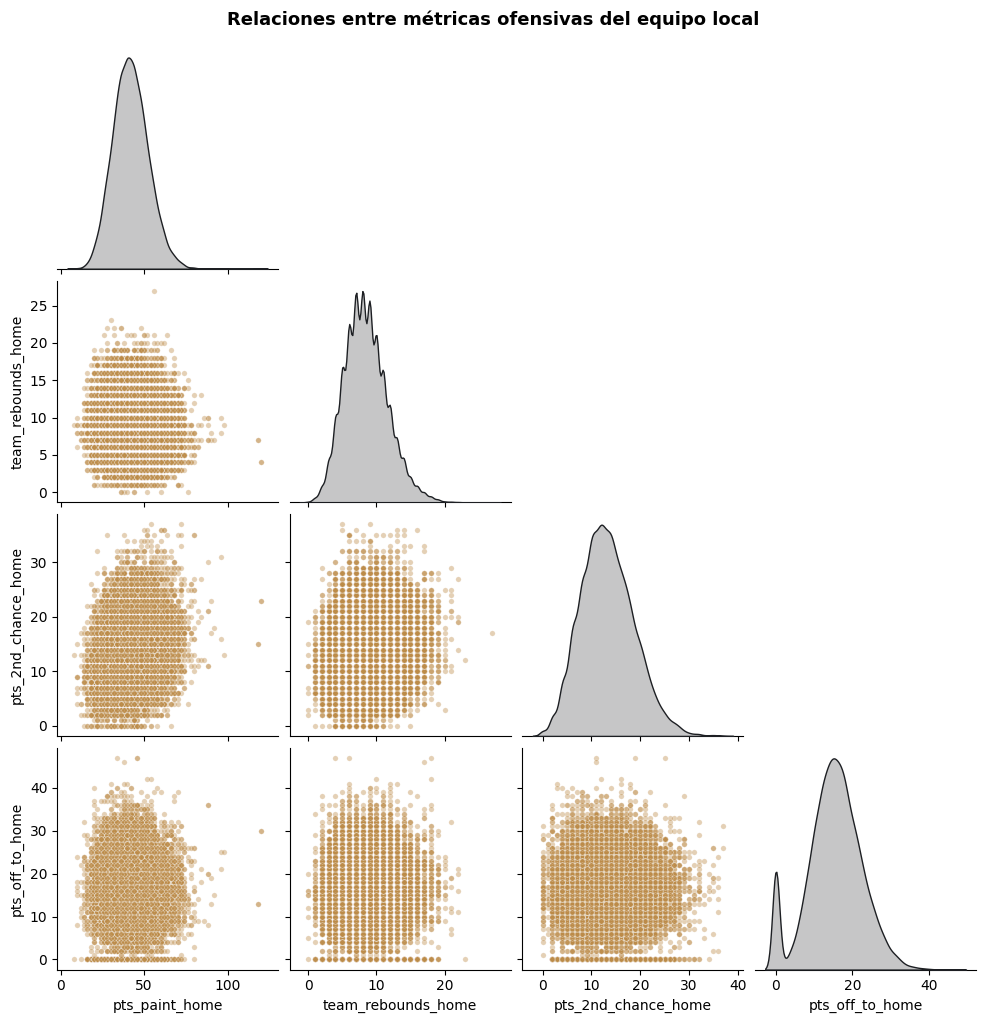

In [ ]:
# Detectar correlaciones visuales del equipo local.
sns.pairplot(
    other_stats[["pts_paint_home", "team_rebounds_home", "pts_2nd_chance_home", "pts_off_to_home"]],
    corner=True,
    diag_kind="kde",  # suaviza la curva superior
    plot_kws={
        "alpha": 0.4,         
        "color": "#bc8b48",  
        "s": 15               # tamaño de los puntos
    }
)

plt.suptitle("Relaciones entre métricas ofensivas del equipo local", 
             y=1.02, fontsize=13, fontweight='bold')
plt.show()

In [ ]:
# Detectar correlaciones visuales del equipo visitante. 
sns.pairplot(
    other_stats[["pts_paint_away", "team_rebounds_home", "pts_2nd_chance_home", "pts_off_to_home"]],
    corner=True,
    diag_kind="kde",  # suaviza la curva superior
    plot_kws={
        "alpha": 0.4,         
        "color": "#bc8b48",  
        "s": 15               # tamaño de los puntos
    }
)

plt.suptitle("Relaciones entre métricas ofensivas del equipo local", 
             y=1.02, fontsize=13, fontweight='bold')
plt.show()

In [9]:
#Boxplot general

# Seleccionar solo columnas numéricas
pbp_num = pbp.select_dtypes(include=["int64", "Int64", "float64"])
pbp_num.head()

,eventnum,eventmsgtype,eventmsgactiontype,period,person1type,person2type,person3type
0,0,12,0,1,0,0,0
1,2,10,0,1,4,5,5
2,3,2,1,1,5,0,0
3,4,4,0,1,4,0,0
4,5,2,1,1,4,0,0


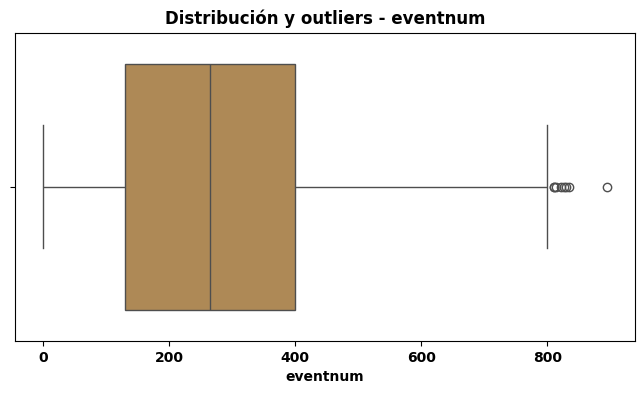

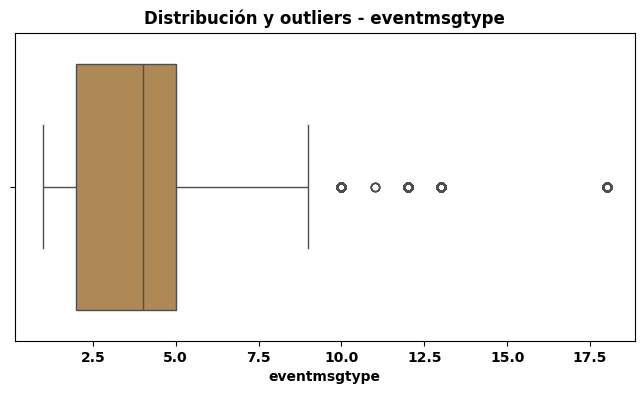

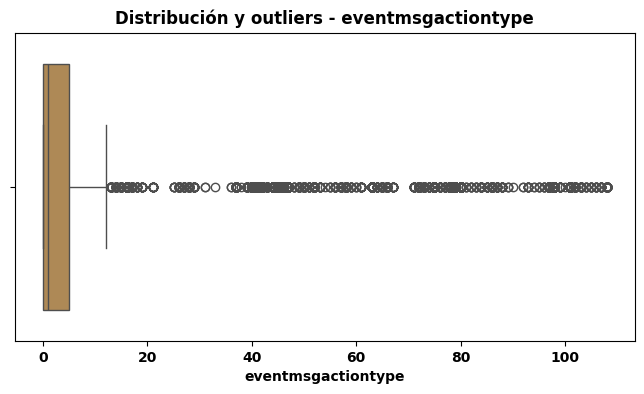

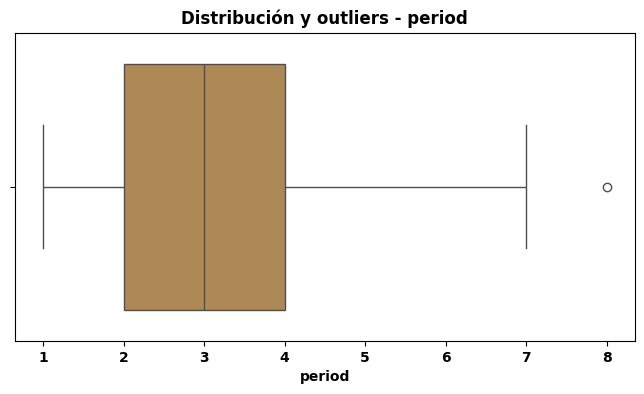

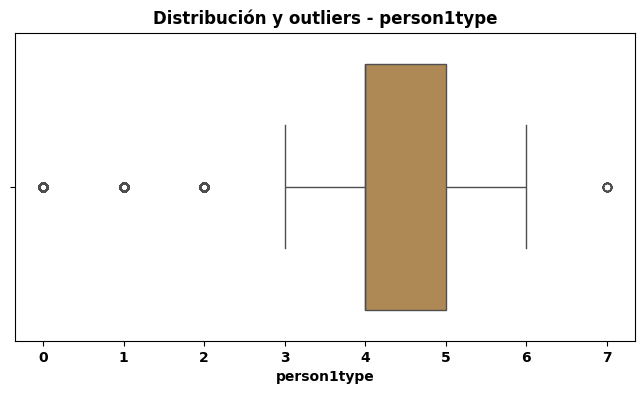

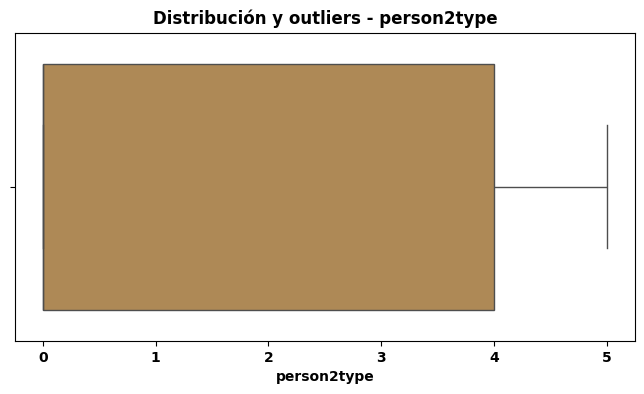

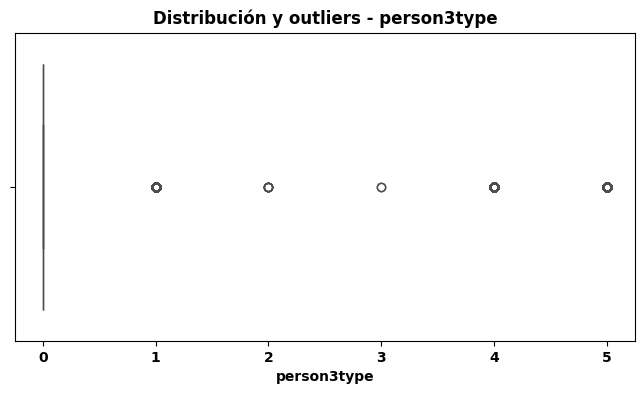

In [11]:
for col in pbp_num.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=pbp_num[col].sample(n=50000, random_state=42), color="#bc8b48")
    plt.title(f"Distribución y outliers - {col}", fontsize=12, fontweight='bold')
    plt.xlabel(col, fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.show()

C:\Users\Valentina\AppData\Local\Temp\ipykernel_21684\2115840603.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players.values, y=top_players.index, palette=paleta_pf)
C:\Users\Valentina\AppData\Local\Temp\ipykernel_21684\2115840603.py:12: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_players.values, y=top_players.index, palette=paleta_pf)


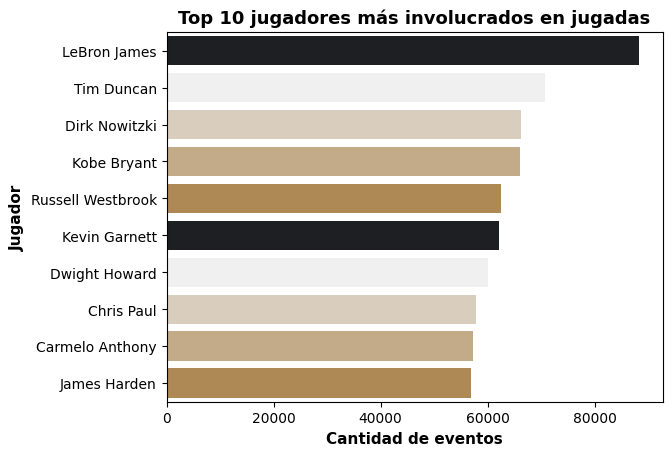

In [12]:
# Combinar las tres columnas de jugadores
players_all = pd.concat([
    pbp["player1_name"],
    pbp["player2_name"],
    pbp["player3_name"]
])

# Contar frecuencia total
top_players = players_all.value_counts().head(10)

# Graficar
sns.barplot(x=top_players.values, y=top_players.index, palette=paleta_pf)
plt.title("Top 10 jugadores más involucrados en jugadas", fontsize=13, fontweight='bold')
plt.xlabel("Cantidad de eventos", fontsize=11, fontweight='bold')
plt.ylabel("Jugador", fontsize=11, fontweight='bold')
plt.show()

In [ ]:
#Combinar las tres columnas de equipos. (PREGUNTAR PORQUE TIENEN MUCHOS NULOS ALGUNAS COLUMNAS)
teams_all = pd.concat([
    pbp["player1_team_abbreviation"],
    pbp["player2_team_abbreviation"],
    pbp["player3_team_abbreviation"]
])

# Limpiar valores
teams_all = teams_all.dropna().str.strip()

# Contar frecuencia total
top_teams = teams_all.value_counts().head(10)

# 🎨 Gráfico con estilo personalizado
sns.set_style("whitegrid")
sns.barplot(
    x=top_teams.values,
    y=top_teams.index,
    palette=paleta_pf[4:10]
)

# 🏀 Títulos y etiquetas en negrita
plt.title("Top 10 equipos con más eventos registrados", fontsize=13, fontweight="bold")
plt.xlabel("Cantidad de eventos", fontsize=11, fontweight="bold")
plt.ylabel("Equipo", fontsize=11, fontweight="bold")

# Ejes en negrita
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

plt.show()

# ETL

- Tabla officials.


In [ ]:
#Eliminación de columna jersey_num
officials = officials.drop(columns=['jersey_num'])

In [ ]:
officials.head()

In [ ]:
officials.to_csv('officials_clean.csv', index=False, encoding='utf-8')

Se decidió eliminar la columna de jersey_num para eliminar información no reduntante a nuestro análisis, y descomprimir la cantidad de datos.